In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [3]:
os.mkdir('./images/')
alpha = 'a'
for i in range(0, 26): 
    os.mkdir('./images/' + alpha)
    alpha = chr(ord(alpha) + 1)
    
base_dir = 'D:/My Document/data kevin/Project Skripsi/Braille Dataset/Braille Dataset/'

for file in os.listdir(base_dir):
    letter = file[0]
    copyfile(base_dir+file, './images/' + letter + '/' + file)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './images/'

In [2]:
train_datagen = ImageDataGenerator(rotation_range=20,
    shear_range=10,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    './images/',
    target_size=(28, 28),
    batch_size = 32,
    class_mode='categorical',
    subset='training') # set as training data

val_generator = train_datagen.flow_from_directory(
    './images/', # same directory as training data
    target_size=(28, 28),
    class_mode='categorical',
    batch_size = 32,
    subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [3]:
model_ckpt = ModelCheckpoint('BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.98):
            print("Validation accuracy is reach 98% cancel training")
            self.model.stop_training = True

entry = L.Input(shape=(28,28,3))
x = L.SeparableConv2D(128,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.BatchNormalization()(x)

x = L.SeparableConv2D(256,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.BatchNormalization()(x)

x = L.SeparableConv2D(512,(2,2),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.BatchNormalization()(x)

x = L.GlobalMaxPooling2D()(x)
x = L.Dropout(0.2)(x)
x = L.Dense(256)(x)
x = L.ReLU()(x)
x = L.Dense(128)(x)
x = L.ReLU()(x)
x = L.Dense(26,activation='softmax')(x)

callbacks = myCallback()
model = Model(entry,x)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator,
                              validation_data=val_generator,
                              epochs=100,
                              callbacks=[model_ckpt,reduce_lr,callbacks],
                              verbose=1)

Epoch 1/100
39/39 [==============================] - 10s 225ms/step - loss: 3.2265 - accuracy: 0.0962 - val_loss: 3.2553 - val_accuracy: 0.0577 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 4s 112ms/step - loss: 2.4981 - accuracy: 0.2845 - val_loss: 3.2387 - val_accuracy: 0.0385 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 115ms/step - loss: 1.8167 - accuracy: 0.4567 - val_loss: 3.2370 - val_accuracy: 0.0513 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 4s 107ms/step - loss: 1.3696 - accuracy: 0.5825 - val_loss: 3.2338 - val_accuracy: 0.0481 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 4s 98ms/step - loss: 1.0706 - accuracy: 0.6699 - val_loss: 3.2606 - val_accuracy: 0.0385 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 4s 99ms/step - loss: 0.8777 - accuracy: 0.7244 - val_loss: 3.2734 - val_accuracy: 0.0385 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 4s 100ms/ste

39/39 [==============================] - 4s 99ms/step - loss: 0.0344 - accuracy: 0.9912 - val_loss: 0.0864 - val_accuracy: 0.9712 - lr: 1.0000e-04
Epoch 54/100
39/39 [==============================] - 4s 96ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.1820 - val_accuracy: 0.9583 - lr: 1.0000e-04
Epoch 55/100
39/39 [==============================] - 4s 99ms/step - loss: 0.0274 - accuracy: 0.9952 - val_loss: 0.1165 - val_accuracy: 0.9647 - lr: 1.0000e-04
Epoch 56/100
39/39 [==============================] - 4s 95ms/step - loss: 0.0321 - accuracy: 0.9904 - val_loss: 0.0887 - val_accuracy: 0.9712 - lr: 1.0000e-04
Epoch 57/100
39/39 [==============================] - 4s 97ms/step - loss: 0.0480 - accuracy: 0.9840 - val_loss: 0.0853 - val_accuracy: 0.9776 - lr: 1.0000e-04
Epoch 58/100
39/39 [==============================] - 4s 96ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.1167 - val_accuracy: 0.9551 - lr: 1.0000e-04
Epoch 59/100
39/39 [==============================] -

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 separable_conv2d (Separable  (None, 26, 26, 128)      539       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 128)      512       
 ormalization)                                                   
                                                                 
 separable_conv2d_1 (Separab  (None, 11, 11, 256)      34176     
 leConv2D)                                                   

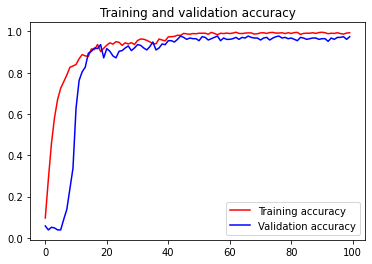

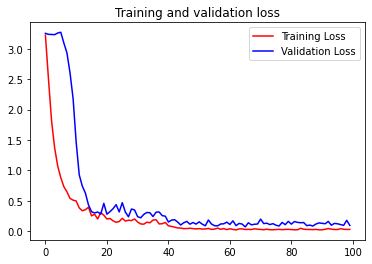

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
model.save('BrailleNet.h5')

In [74]:
layer_names = [layer.name for layer in model.layers]
layer_names

['input_1',
 'separable_conv2d',
 'max_pooling2d',
 'batch_normalization',
 'separable_conv2d_1',
 'max_pooling2d_1',
 'batch_normalization_1',
 'separable_conv2d_2',
 'max_pooling2d_2',
 'batch_normalization_2',
 'global_max_pooling2d',
 'dropout',
 'dense',
 're_lu',
 'dense_1',
 're_lu_1',
 'dense_2']

In [75]:
layer_outputs = [layer.output for layer in model.layers]
feature_maps = tf.keras.models.Model(model.input, layer_outputs)

In [76]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
img = load_img('./Braille Dataset/Braille Dataset/a1.JPG0dim.jpg', target_size=(28, 28))  
x = img_to_array(img)
x=x.reshape((1,28,28,3))

In [77]:
feature_maps = feature_maps.predict(x)
print(len(feature_maps))

17


(1, 28, 28, 3)
(1, 26, 26, 128)
(1, 13, 13, 128)


C:\Users\KEVINM~1\AppData\Local\Temp/ipykernel_12652/3598933674.py:10: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


(1, 13, 13, 128)
(1, 11, 11, 256)
(1, 5, 5, 256)
(1, 5, 5, 256)
(1, 4, 4, 512)
(1, 2, 2, 512)


C:\Users\KEVINM~1\AppData\Local\Temp/ipykernel_12652/3598933674.py:10: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std()


(1, 2, 2, 512)
(1, 512)
(1, 512)
(1, 256)
(1, 256)
(1, 128)
(1, 128)
(1, 26)


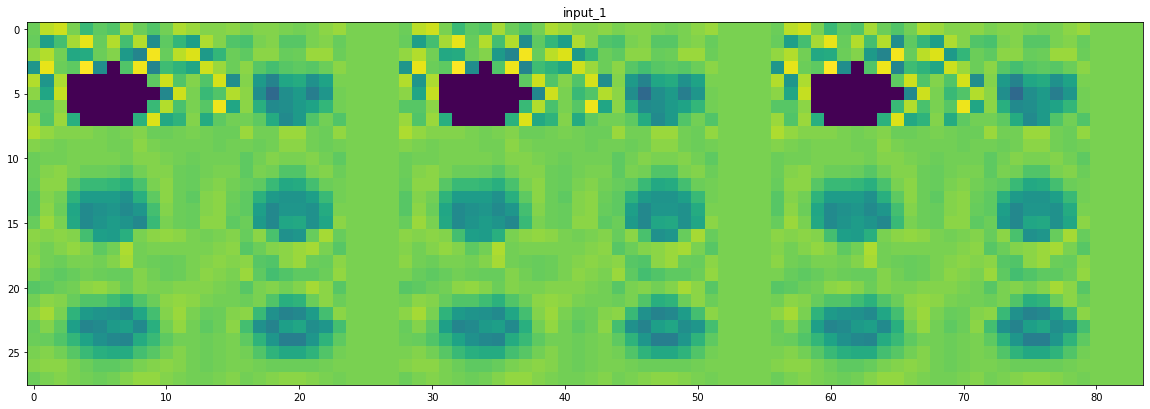

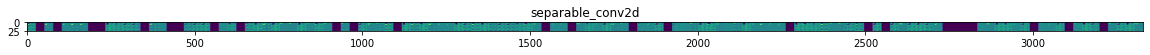

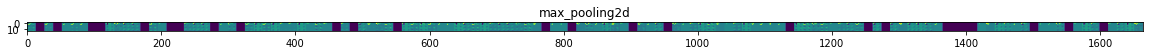

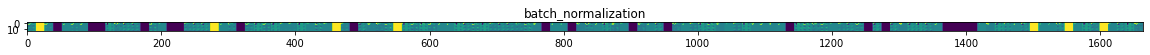

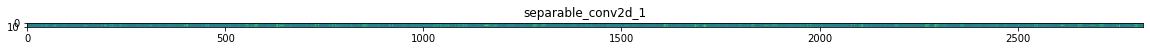

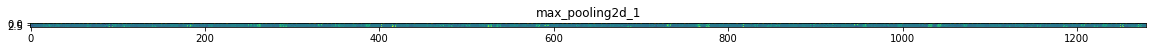

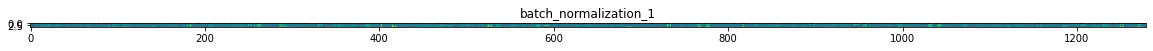

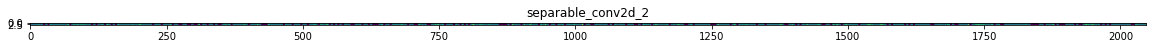

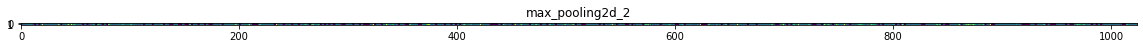

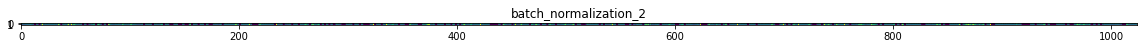

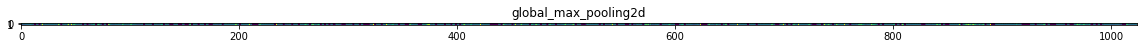

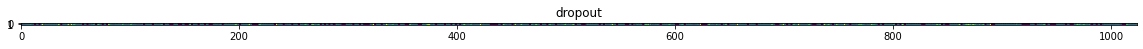

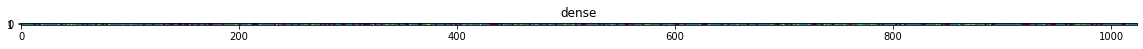

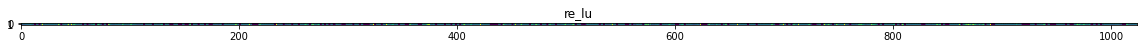

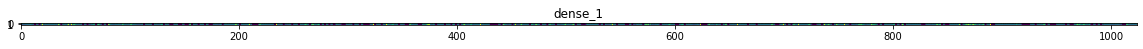

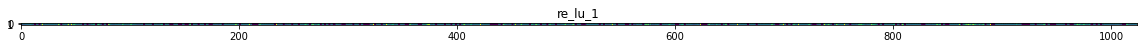

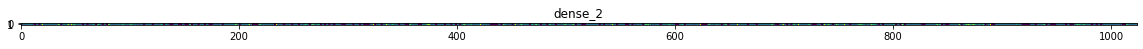

In [78]:
for layer_names, feature_maps in zip(layer_names,feature_maps):
    print(feature_maps.shape)
    if len(feature_maps.shape) == 4 :
        channels = feature_maps.shape[-1]
        size = feature_maps.shape[1]
        display_grid = np.zeros((size, size * channels))
        for i in range(channels):
            x = feature_maps[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')